In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 日本語フォント設定（環境に合わせて変更）
plt.rcParams['font.family'] = 'Meiryo'  

def load_and_prepare_data(csv_path: str) -> pd.DataFrame:
    df = pd.read_csv(csv_path)

    # 日付をdatetime型に変換
    df["発売日"] = pd.to_datetime(df["発売日"], format="%Y年%m月%d日", errors='coerce')

    # 金額の文字列を数値に変換
    df["希望小売価格"] = (
        df["希望小売価格"]
        .astype(str)
        .str.replace("円", "", regex=False)
        .str.replace(",", "")
        .astype(float)
    )
    df["買取価格"] = (
        df["買取価格"]
        .astype(str)
        .str.replace("¥", "", regex=False)
        .str.replace(",", "")
        .astype(float)
    )

    # 経過年数
    today = datetime.today()
    df["経過年数"] = (today - df["発売日"]).dt.days / 365.25

    # ROIとCAGRの計算
    df["ROI"] = (df["買取価格"] - df["希望小売価格"]) / df["希望小売価格"]
    df["CAGR"] = (df["買取価格"] / df["希望小売価格"]) ** (1 / df["経過年数"]) - 1

    return df

def plot_cagr(df: pd.DataFrame, top_n: int = 10):
    df_sorted = df.sort_values("CAGR", ascending=False).head(top_n)

    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted["パック名"], df_sorted["CAGR"])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("CAGR（年平均成長率）")
    plt.title(f"上位{top_n}パックのCAGR")
    plt.tight_layout()
    plt.show()

# 実行パート
csv_path = "merged_data_all.csv"  
df = load_and_prepare_data(csv_path)

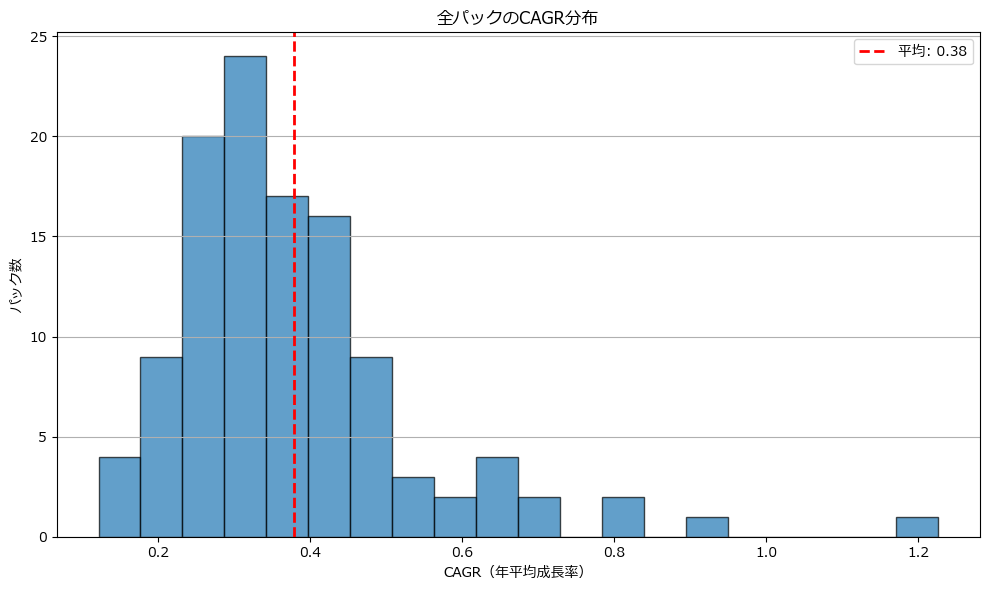

In [4]:
mean_cagr = df["CAGR"].mean()

plt.figure(figsize=(10, 6))
plt.hist(df["CAGR"], bins=20, edgecolor='black', alpha=0.7)
plt.axvline(mean_cagr, color='red', linestyle='dashed', linewidth=2, label=f'平均: {mean_cagr:.2f}')
plt.xlabel("CAGR（年平均成長率）")
plt.ylabel("パック数")
plt.title("全パックのCAGR分布")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()